> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the `Project Details` page of `Investigate a Dataset` lesson for this course. List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, trim the excess and organize your steps so that you have a flowing, cohesive report.

In [4]:

# Loading the data
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head(1)



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [146]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
df.shape

(110527, 14)

In [6]:
# show summary for all columns
df.describe(include = 'all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


#### Count number of distinct elements in specified axis.

In [150]:

df.nunique(axis=0)

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

#### Missing value in data set:

In [151]:

df.isnull().sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### Check wheather it has duplicate values or not

In [205]:
sum(df.duplicated())
# df.duplicated().sum()

0

In [206]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

#### Let's explore data types and memory usage
memory usage: 11.8+ MB!!!

In [7]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  float64            
 1   appointmentid   110527 non-null  int32              
 2   gender          110527 non-null  category           
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int8               
 6   neighbourhood   110527 non-null  category           
 7   scholarship     110527 non-null  bool               
 8   hipertension    110527 non-null  bool               
 9   diabetes        110527 non-null  bool               
 10  alcoholism      110527 non-null  bool               
 11  handcap         110527 non-null  category           
 12  sms_received    110527 non-null  bool               
 13  no_show       

In [208]:
# how many different patients exist in the dataset
df.PatientId.nunique()

AttributeError: 'DataFrame' object has no attribute 'PatientId'

In [183]:
# check that AppointmentID is a unique row identifier
df.AppointmentID.nunique()

110527

In [184]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [185]:
# Let's study the patient age
df.groupby(['Age', 'PatientId'])['Age'].count()

Age   PatientId   
-1    4.659432e+14    1
 0    2.699191e+08    2
      3.424788e+08    1
      4.279622e+08    1
      1.192462e+09    1
                     ..
 100  5.578313e+13    1
 102  2.342836e+11    1
      9.762948e+14    1
 115  3.196321e+13    4
      7.482346e+14    1
Name: Age, Length: 63467, dtype: int64

In [82]:
df.appointmentday.values

array(['2016-04-29T00:00:00.000000000', '2016-04-29T00:00:00.000000000',
       '2016-04-29T00:00:00.000000000', ...,
       '2016-06-07T00:00:00.000000000', '2016-06-07T00:00:00.000000000',
       '2016-06-07T00:00:00.000000000'], dtype='datetime64[ns]')

In [100]:
df.gender.value_counts

<bound method IndexOpsMixin.value_counts of 0         F
1         M
2         F
3         F
4         F
         ..
110522    F
110523    F
110524    F
110525    F
110526    F
Name: gender, Length: 110527, dtype: category
Categories (2, object): ['F', 'M']>

In [160]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df.scheduledday.values

array(['2016-04-29T18:38:08.000000000', '2016-04-29T16:08:27.000000000',
       '2016-04-29T16:19:04.000000000', ...,
       '2016-04-27T16:03:52.000000000', '2016-04-27T15:09:23.000000000',
       '2016-04-27T13:30:56.000000000'], dtype='datetime64[ns]')

In [101]:
df.gender.unique()

['F', 'M']
Categories (2, object): ['F', 'M']

In [189]:
df.no_show.unique()

array(['No', 'Yes'], dtype=object)

#### What we need to clean up?

1. Drop AppointmentID can be dropped as we are not interested in it in our data analysis.
2. Rename all columns so the names looks consistent.
3. Investigate the data types
4. Gender and Handicap need to be transformed to category type. There are a few cases of more than one handicap.
5. Day columns (scheduledday, appointmentday) need to be transformed to datetime types.
6. Boolean columns Scholarship, Hypertension, Diabetes, Alcoholism, SMSReceived should be converted to bool types.
7. NoShow should also be transformed to bool type.
8. Age column type can be cut up to int8
9. Neighbourhood needs further investigation of its values and distribution to decide on the appropriate data type: 


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

#### Columns names look inconsistant. Let's rename them all in a more readable way.


In [8]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

#### Age type could be cut off from 'int64' to 'int8'

In [209]:
df[['age']].value_counts()

age
0      3540
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Length: 103, dtype: int64

#### A strange age '-1' is detected, needs to be removed from original frame

In [193]:
df[df.age==-1]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [35]:
# change Age=-1 to a more realistic Age=0
df['age'].replace({-1: 0}, inplace=True)

In [36]:
df.age = df.age.astype("int8")

In [24]:
df.rename(columns={"hipertension": "hypertension"}, inplace=True)
df.hypertension

0          True
1         False
2         False
3         False
4          True
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Name: hypertension, Length: 110527, dtype: bool

#### Optimize the rest of the fields

In [11]:
# categorical data type
for c in ['gender', 'neighbourhood', 'handcap']:
    df[c] = df[c].astype('category')

# day columns
for c in ['scheduledday', 'appointmentday']:
    df[c] = pd.to_datetime(df[c])

# change scholarship, hypertension, diabetes, alcoholism, snsreceived to bool data type
for c in ['scholarship', 'hipertension', 'diabetes', 'alcoholism', 'sms_received']:
    df[c] = df[c].astype('bool')
# no_show column transformation
df['no_show'].replace({'No': 0, 'Yes': 1}, inplace=True)
# no_show type change
df['no_show'] = df['no_show'].astype('bool')
# confirm changed data types
df.dtypes


patientid                     float64
appointmentid                   int64
gender                       category
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                              int8
neighbourhood                category
scholarship                      bool
hipertension                     bool
diabetes                         bool
alcoholism                       bool
handcap                      category
sms_received                     bool
no_show                          bool
dtype: object

##### Optimize the data with type convertion, now it is 'memory usage: 4.0 MB'!!!!

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  float64            
 1   gender          110527 non-null  category           
 2   scheduledday    110527 non-null  datetime64[ns, UTC]
 3   appointmentday  110527 non-null  datetime64[ns, UTC]
 4   age             110527 non-null  int8               
 5   neighbourhood   110527 non-null  category           
 6   scholarship     110527 non-null  bool               
 7   hipertension    110527 non-null  bool               
 8   diabetes        110527 non-null  bool               
 9   alcoholism      110527 non-null  bool               
 10  handcap         110527 non-null  category           
 11  sms_received    110527 non-null  bool               
 12  no_show         110527 non-null  bool               
dtypes: bool(6), ca

In [12]:
# dropping appointmentid column as it is not important in my research
df.drop(['appointmentid'], axis=1, inplace=True)



In [221]:
# show some of the duplicates
df_dup = df[df.duplicated()]
df_dup.head(5)

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
154,1.925263e+10,F,2016-04-28 16:38:34+00:00,2016-04-29 00:00:00+00:00,30,ITARARÉ,False,False,False,False,0,False,False
369,4.341600e+14,F,2016-04-29 09:43:15+00:00,2016-04-29 00:00:00+00:00,39,PRAIA DO CANTO,False,False,False,False,0,False,False
371,4.497415e+09,F,2016-04-19 11:16:27+00:00,2016-04-29 00:00:00+00:00,11,BELA VISTA,False,False,False,False,0,False,False
466,5.161239e+12,F,2016-04-27 13:16:02+00:00,2016-04-29 00:00:00+00:00,49,CONSOLAÇÃO,False,False,False,False,0,False,False
554,4.916356e+12,M,2016-03-29 12:40:26+00:00,2016-04-29 00:00:00+00:00,40,CENTRO,False,False,False,False,0,False,True


In [214]:
# check for duplicatesafter dropping ID column
print(df.duplicated().sum())

618


#### Seems patients can indeed be scheduled for more than one appointment at the same time!!!

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.




### Utils


In [84]:

def count_plot(dfdata, xdata, gxlabel, gylabel, gtitle, gcolor=None, gpalette=None):
    g = sns.countplot(data = dfdata, x = xdata, color = gcolor, palette= gpalette)
    plt.title(gtitle)
    plt.xlabel(gxlabel)
    plt.ylabel(gylabel)
    return g

def bar_plot(xdata, ydata, gxlabel, gylabel, gtitle, gerrwidth=None, gpalette=None):
    g = sns.barplot(x = xdata, y = ydata, errwidth = gerrwidth, palette = gpalette)
    g.set(xlabel = gxlabel, ylabel = gylabel, title = gtitle)
    return g

### Research Question 1 Calculate how many patients have scheduled an appointment but did not arrive (countplot, subplot)

Text(0, 0.5, 'Number of appointments')

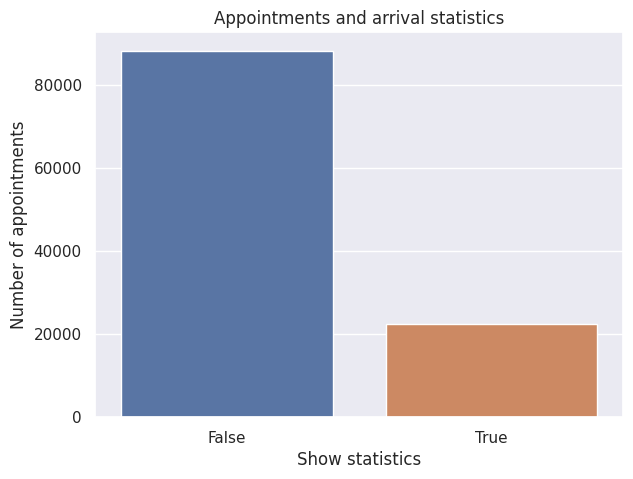

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x = "no_show", color = None, palette= None)
plt.title("Appointments and arrival statistics")
plt.xlabel("Show statistics")
plt.ylabel("Number of appointments")

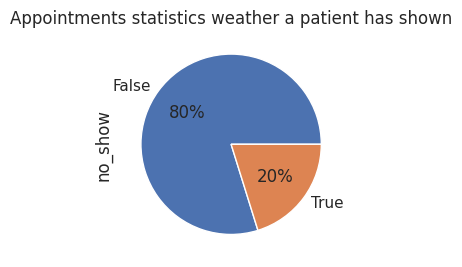

In [228]:
plt.subplot(1,2,2)
df.no_show.value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.title('Appointments statistics if a patient has shown on an appointment')
plt.show()

#### The highest correlation is for hypertension and age, hypertension and diabetes, and diabetes and age here:

In [85]:

df.corr().style.background_gradient(cmap='Blues')

/tmp/ipykernel_13/4096615964.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='Blues')


,patientid,age,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,DateDiff,date_diff
patientid,1.000000,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.009749,-0.001461,-0.001484,-0.001484
age,-0.004139,1.000000,-0.092457,0.504586,0.292392,0.095811,0.012643,-0.060319,0.034792,0.034792
scholarship,-0.002880,-0.092457,1.000000,-0.019729,-0.024894,0.035022,0.001194,0.029135,-0.029964,-0.029964
hypertension,-0.006441,0.504586,-0.019729,1.000000,0.433086,0.087971,-0.006267,-0.035701,-0.016336,-0.016336
diabetes,0.001605,0.292392,-0.024894,0.433086,1.000000,0.018474,-0.014550,-0.015180,-0.026825,-0.026825
alcoholism,0.011011,0.095811,0.035022,0.087971,0.018474,1.000000,-0.026147,-0.000196,-0.038321,-0.038321
sms_received,-0.009749,0.012643,0.001194,-0.006267,-0.014550,-0.026147,1.000000,0.126431,0.397167,0.397167
no_show,-0.001461,-0.060319,0.029135,-0.035701,-0.015180,-0.000196,0.126431,1.000000,0.185076,0.185076
DateDiff,-0.001484,0.034792,-0.029964,-0.016336,-0.026825,-0.038321,0.397167,0.185076,1.000000,1.000000
date_diff,-0.001484,0.034792,-0.029964,-0.016336,-0.026825,-0.038321,0.397167,0.185076,1.000000,1.000000


In [14]:
# there are 22319 no shows in the data, which makes 20% of all appointments
noshow_proportion = df.no_show.sum() / len(df.index)
noshow_proportion

0.20193255946510807

#### Hypertension and age correlation (regplot)
#### There are more people with hypertension among older patients: correlation of 0.5 from above suggests

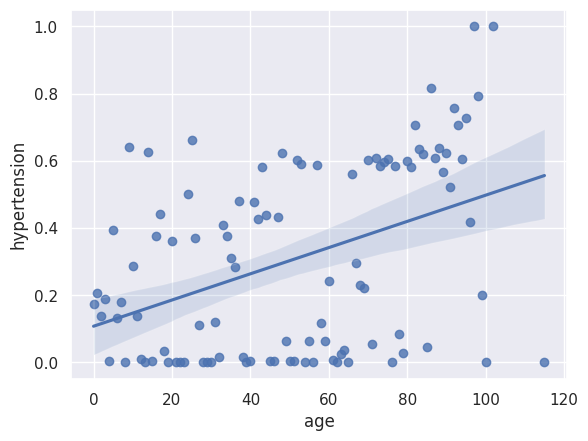

In [25]:
hypertension_mean = df['hypertension'].groupby(df['age']).mean()
age_unique = df['age'].unique()
sns.regplot(x = age_unique, y = hypertension_mean)
plt.xlabel('age')
plt.show()

#### Histagramma shows the number of appointments depends on persons age

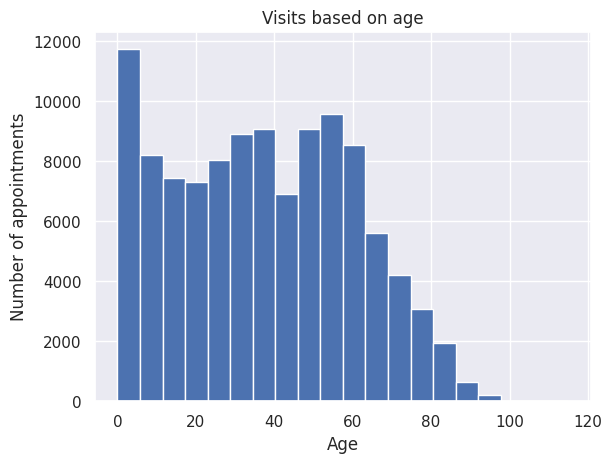

In [41]:
g = df.age.hist(bins=20);
g.set(xlabel = 'Age', ylabel = 'Number of appointments', title = 'Visits based on age')
plt.show()

#### How alcoholism is distributed among patients scheduling appointments by age.
#### The most endangered group are patients between their 40s and 60s. (barplot)


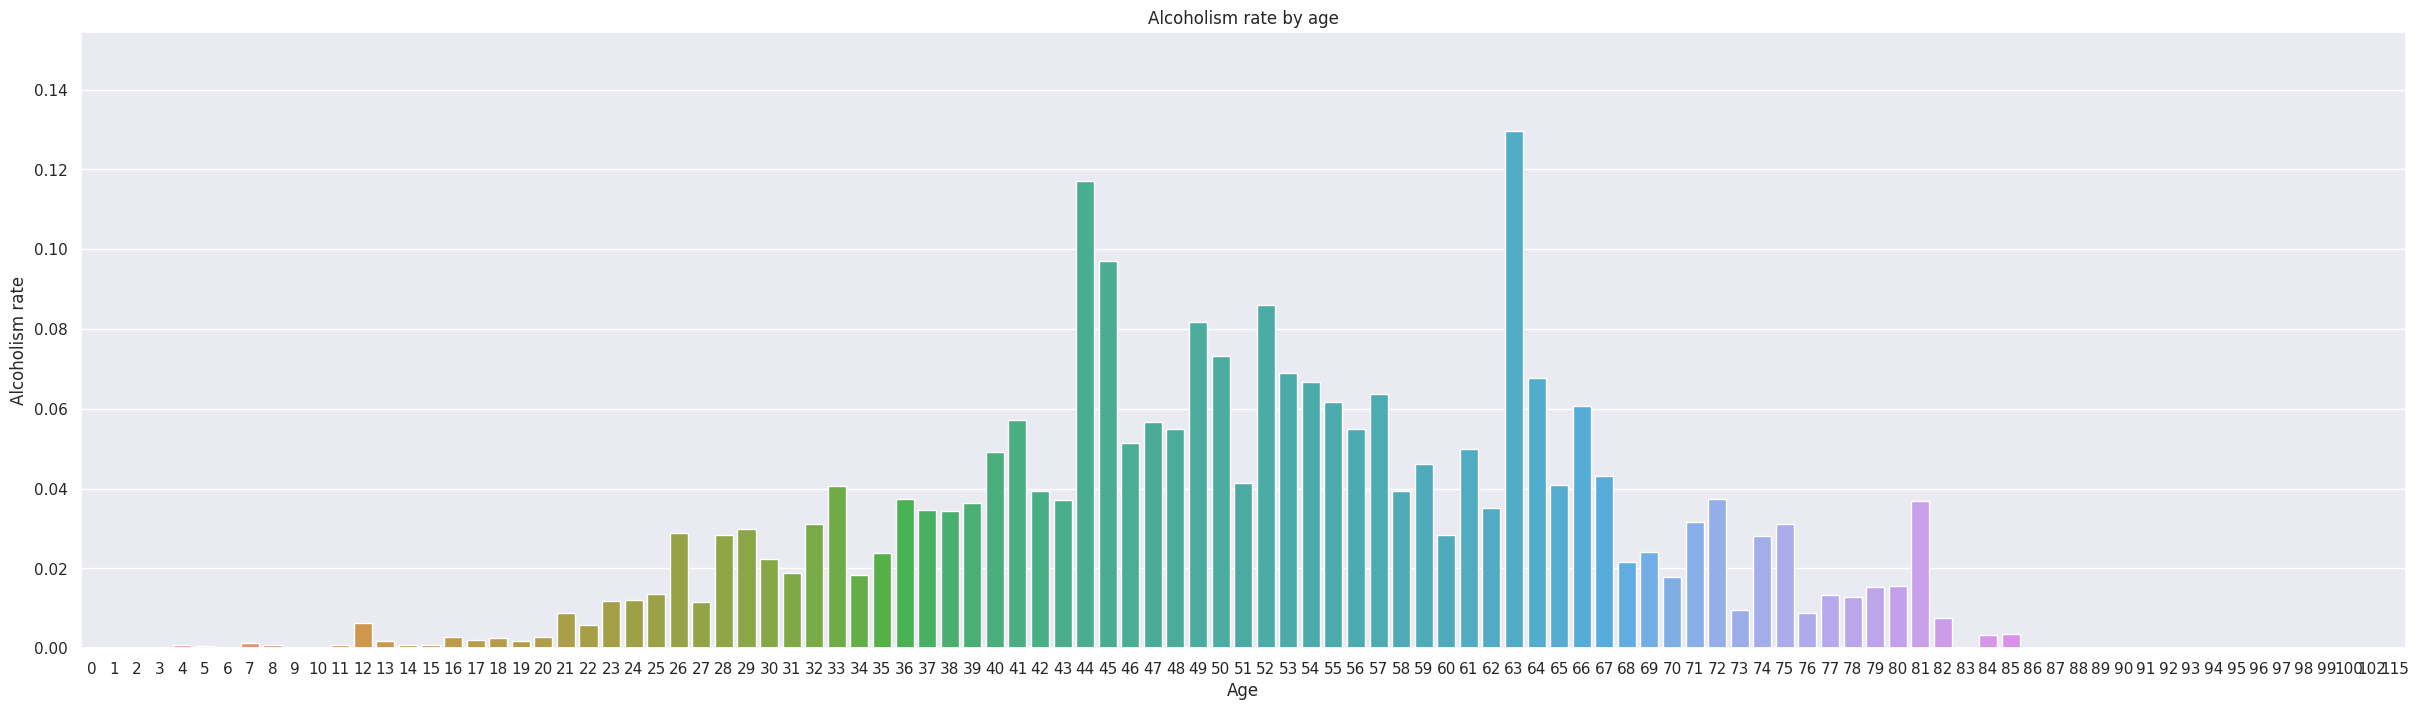

In [43]:


plt.figure(figsize=(30,8))
bar_plot(df.age, df.alcoholism, 'Age', 'Alcoholism rate', 'Alcoholism rate by age', 0)
plt.show()

####  There seem to be elder people are not very responsible to come to the appointment 

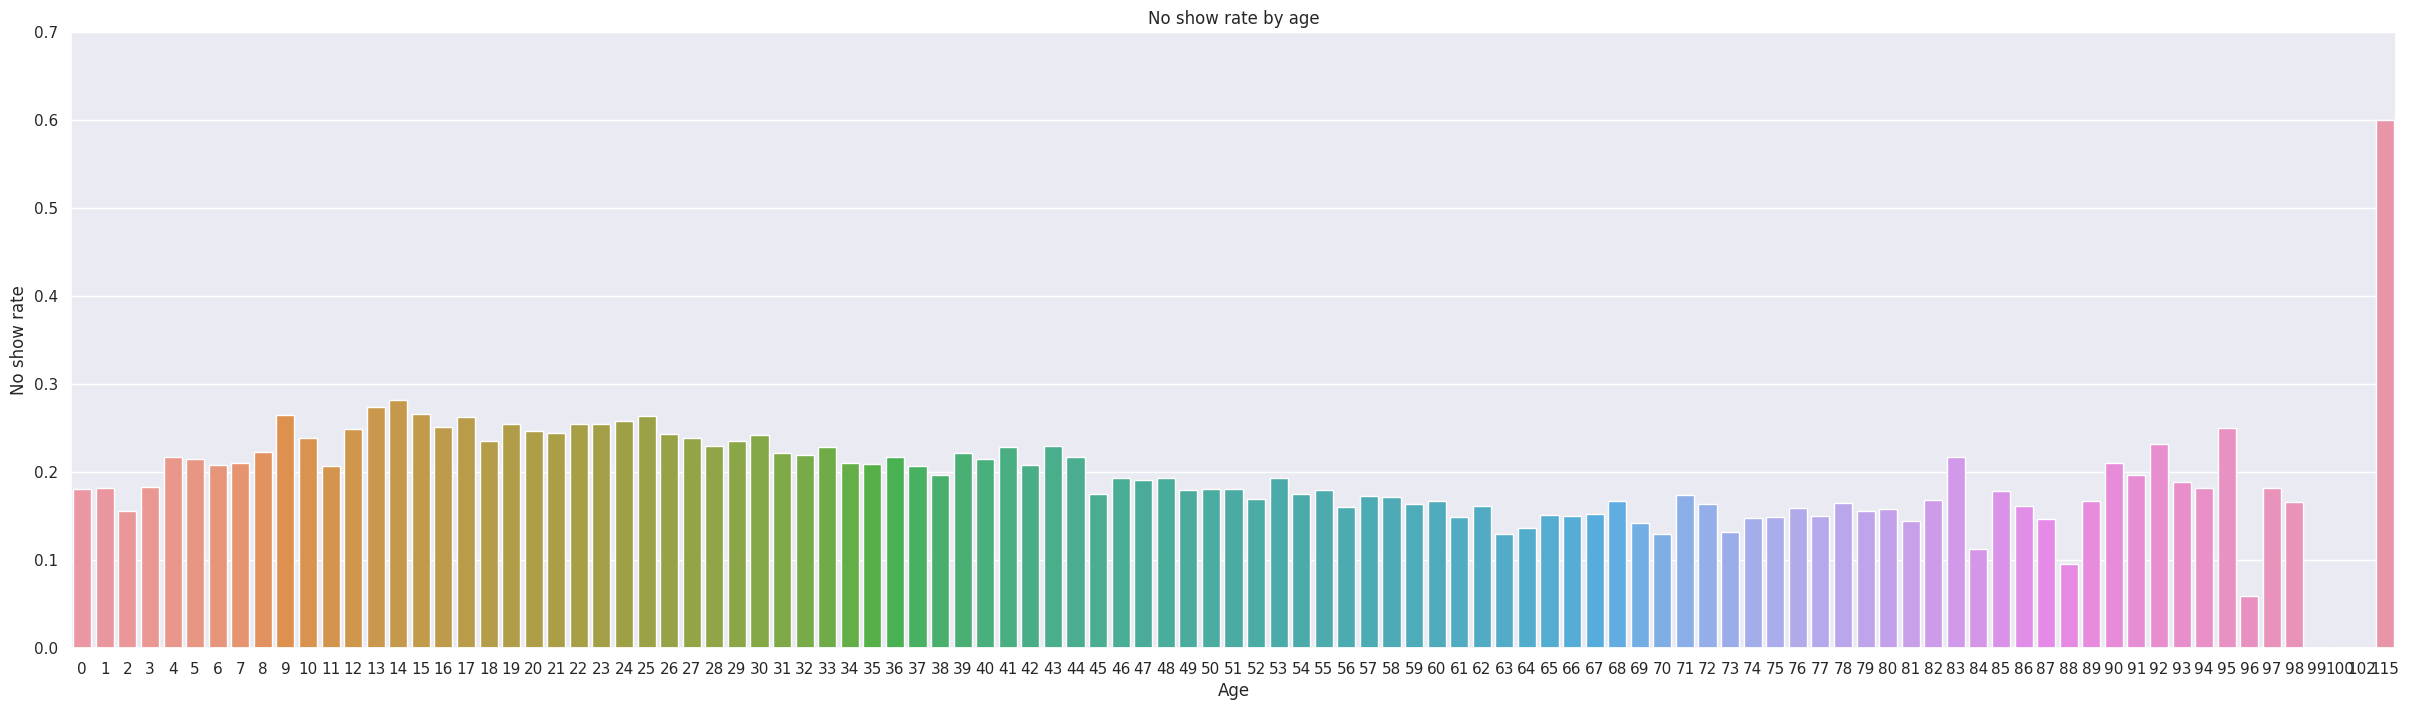

In [39]:

plt.figure(figsize=(30,8))
plt.ylim(0,0.7)
bar_plot(df.age, df.no_show, 'Age', 'No show rate', 'No show rate by age', 0)
plt.show()

#### No show rate by age with errorbar

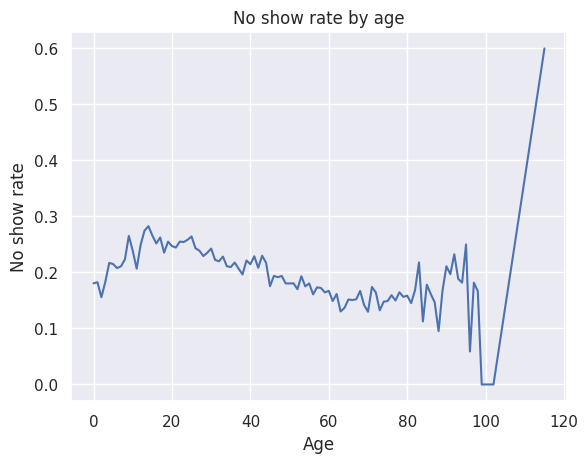

In [40]:
y_means = df.no_show.groupby(df.age).mean()
x_age = df.age.unique()
x_age = sorted(x_age)
plt.errorbar(x = x_age, y = y_means)
plt.title('No show rate by age')
plt.xlabel('Age')
plt.ylabel('No show rate')
plt.show()

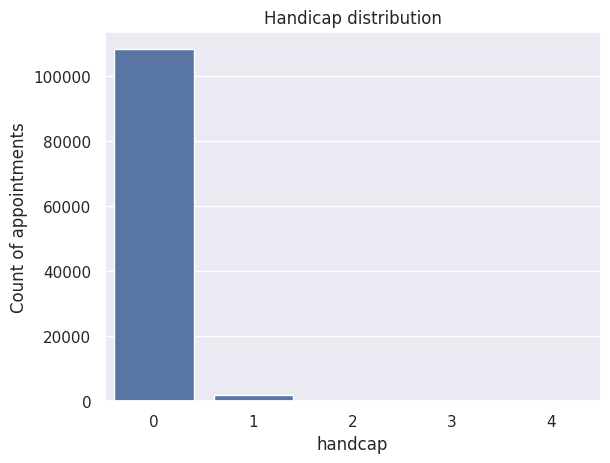

In [46]:
# most appointments are made by patients with no handicap
count_plot(df, 'handcap', 'handcap', 'Count of appointments', 'Handicap distribution', sns.color_palette()[0])
plt.show()

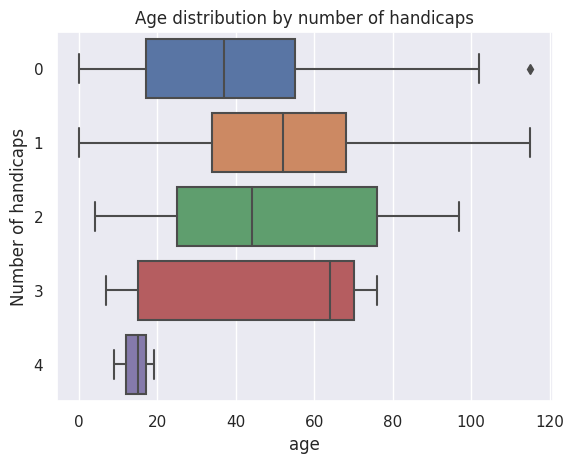

In [48]:
# age distribution for different handicap groups
# age distribution of patients with 4 handicaps is very different because we only have a very small sample of these patients
g = sns.boxplot(data = df, x = 'age', y = 'handcap')
g.set(xlabel='age', ylabel='Number of handicaps', title='Age distribution by number of handicaps')
plt.show()

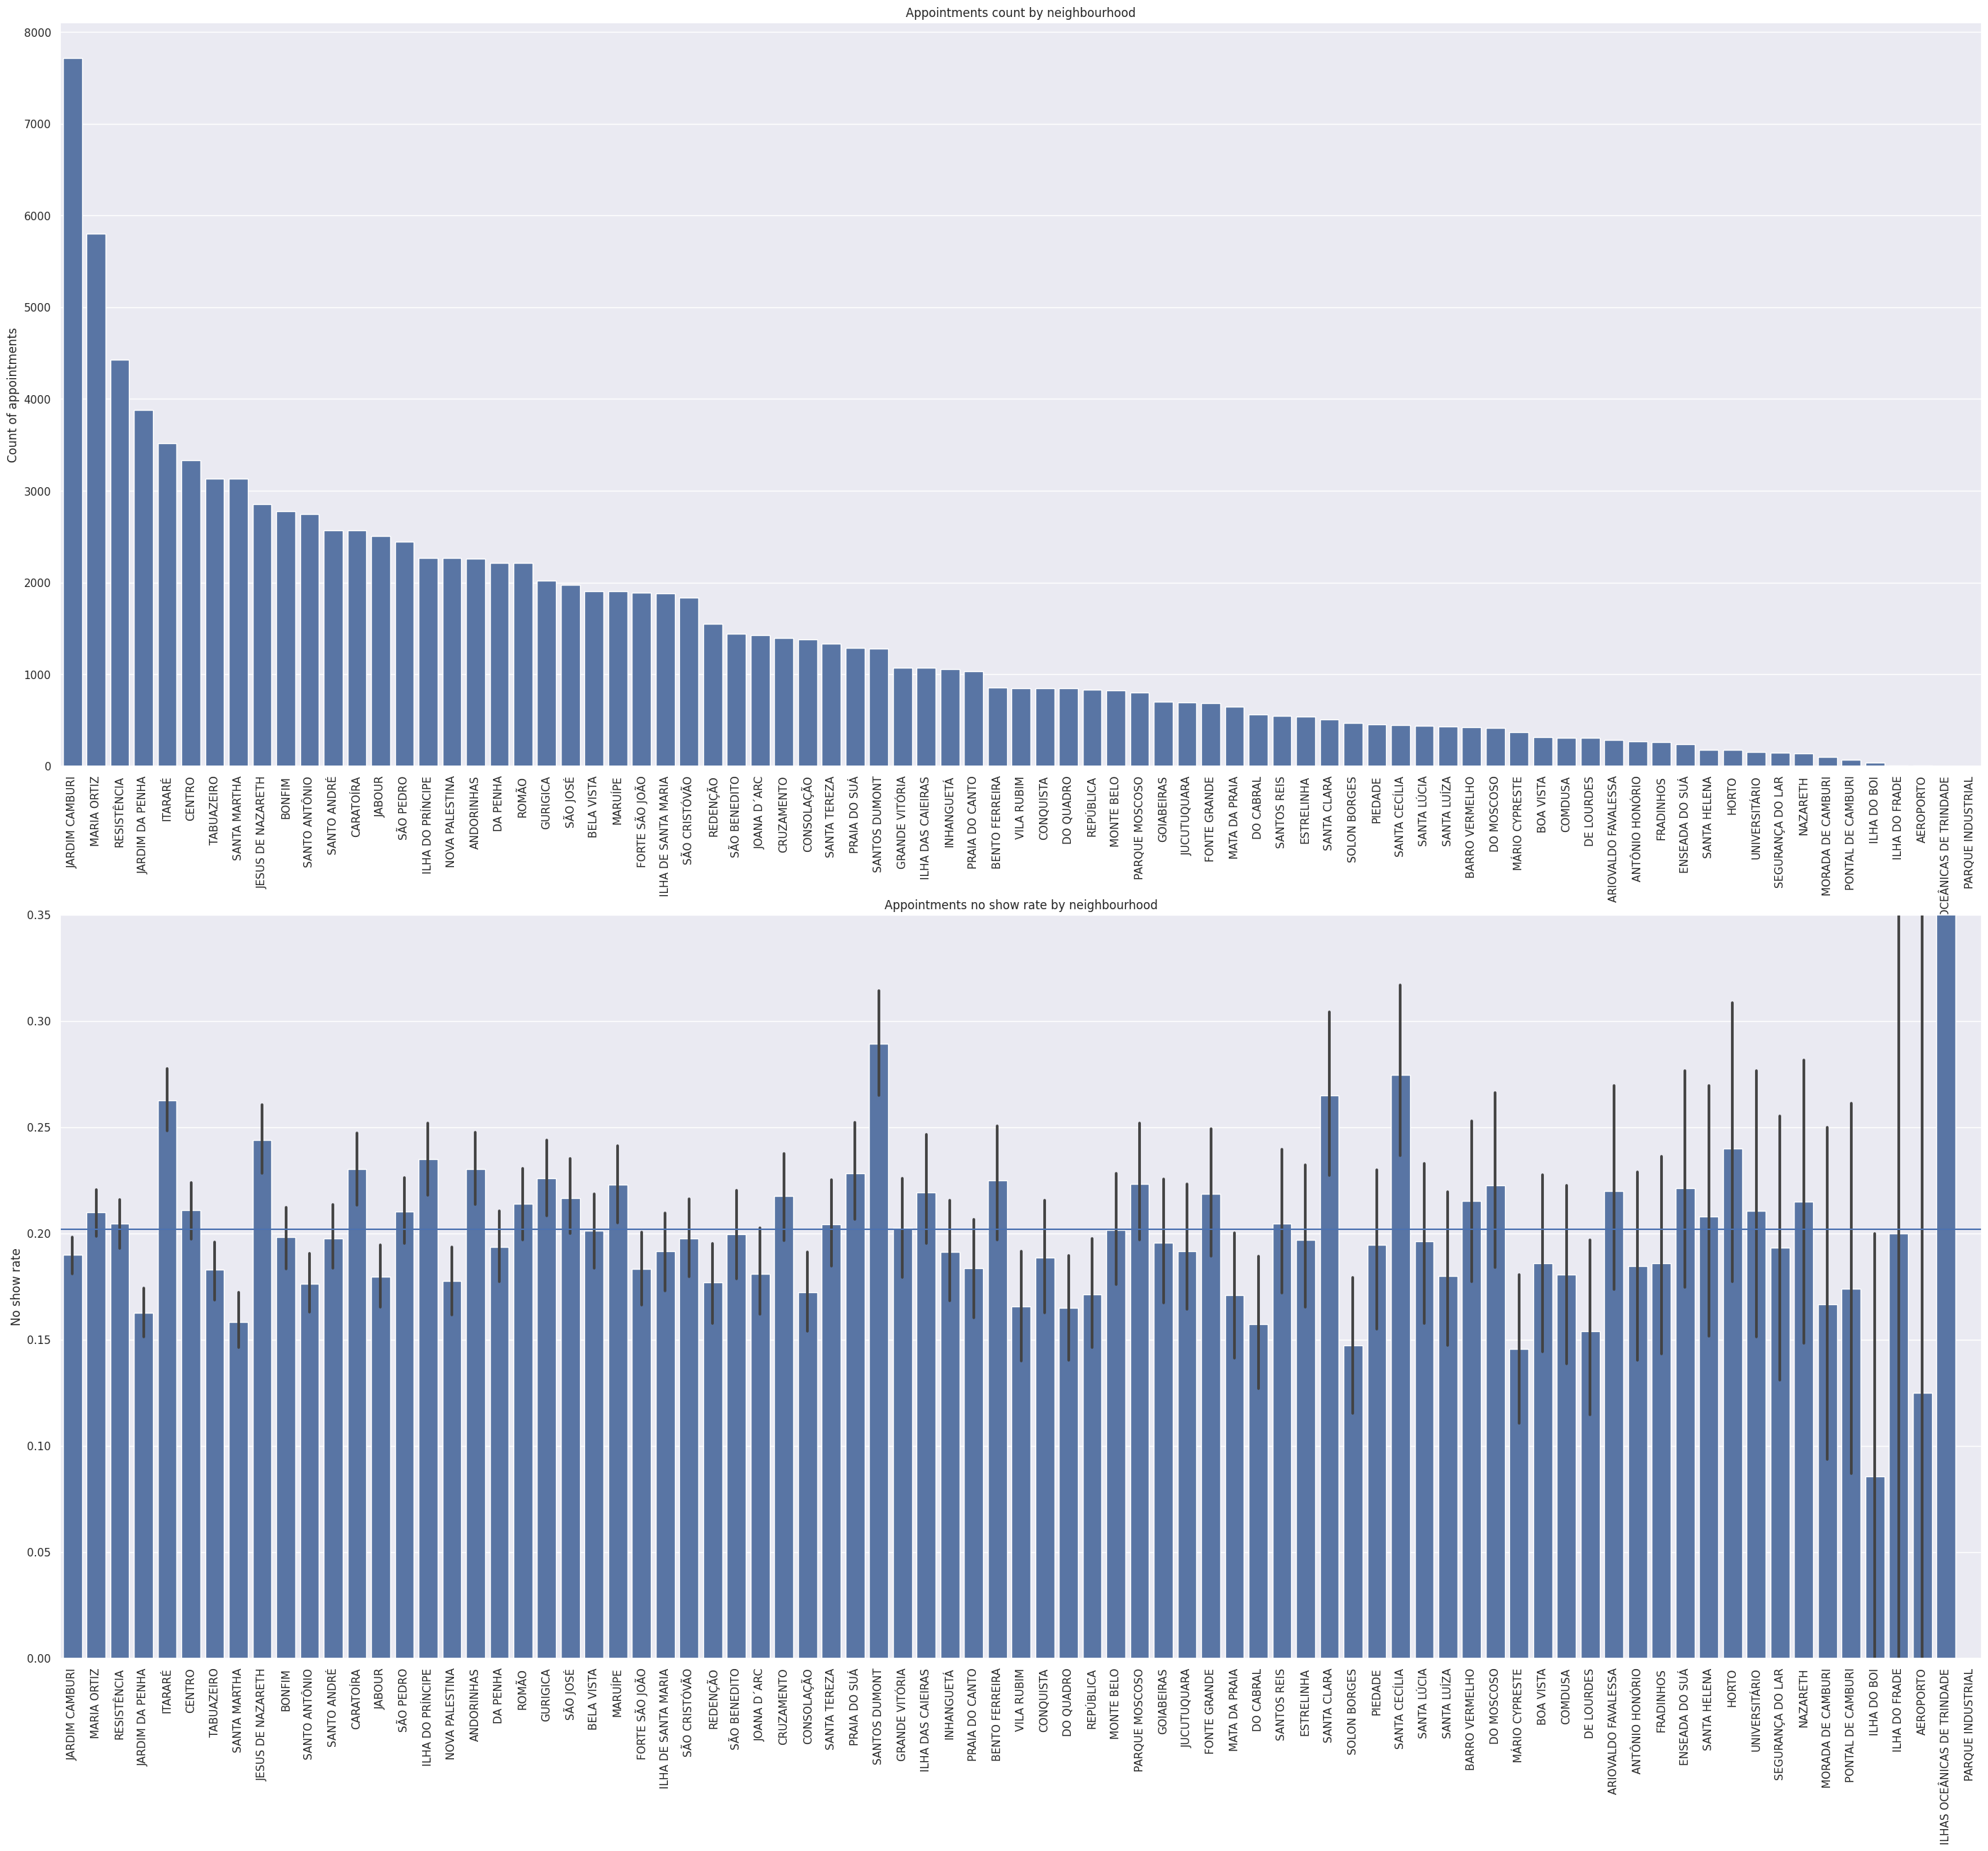

In [51]:
# share of neighbourhoods
# there are a couple of very large neighbourhoods by a number of appointments
plt.figure(figsize=(35,30))

plt.subplot(2, 1, 1)
plt.xticks(rotation=90)
g = sns.countplot(data = df, x = 'neighbourhood', order = df['neighbourhood'].value_counts().index, \
                  color=sns.color_palette()[0])
g.set(ylabel = 'Count of appointments', title = 'Appointments count by neighbourhood')

# neighbourhoods do not deviate widely from the overall 20% no show rate
plt.subplot(2, 1, 2)
plt.xticks(rotation=90)
g = sns.barplot(x = df['neighbourhood'], y = df['no_show'], order = df['neighbourhood'].value_counts().index, \
                color=sns.color_palette()[0]);
g.set_title('Appointments no show rate by neighbourhood')
g.set(ylabel='No show rate', ylim=(0,0.35), xlabel='')
g.axhline(noshow_proportion)

plt.show()

#### There are more females scheduling appointments

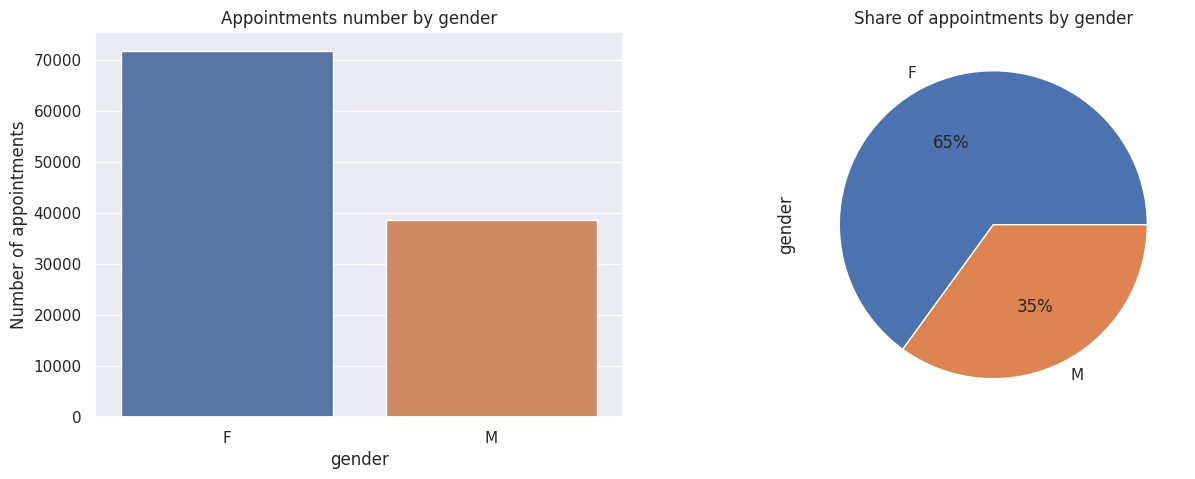

In [60]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
count_plot(df, 'gender', 'gender', 'Number of appointments', 'Appointments number by gender')

plt.subplot(1,2,2)
g2 = df.gender.value_counts().plot(kind='pie',autopct='%1.0f%%')
g2.set(title = 'Share of appointments by gender')

plt.show()

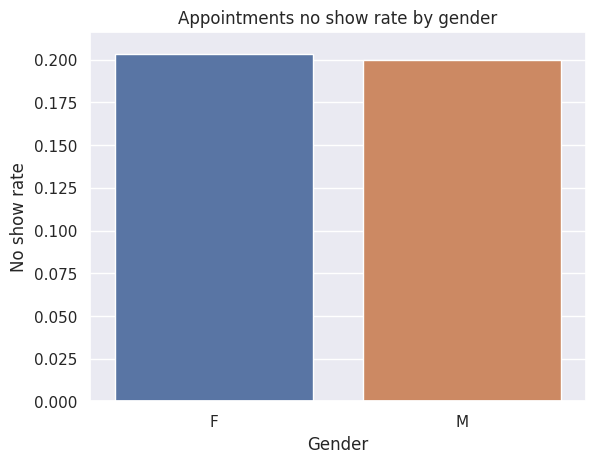

In [71]:
# plot mean of no-show
# There is no large difference in noshow proportion among male and female patients.

bar_plot(df['gender'], df['no_show'], 'Gender', 'No show rate', 'Appointments no show rate by gender', 0)
plt.show()

### Research Question 2  
### Q2: How the appointments scheduled in advance depend on  no-show rate?

In [74]:
datediff = df['appointmentday'] - df['scheduledday']
datediff = pd.to_timedelta(datediff,'D')
datediff.describe()


count                        110527
mean      9 days 17:08:34.161960425
std      15 days 05:51:27.891504122
min               -7 days +10:10:40
25%        -1 days +15:41:31.500000
50%                 3 days 11:22:18
75%         14 days 07:41:34.500000
max               178 days 13:19:01
dtype: object

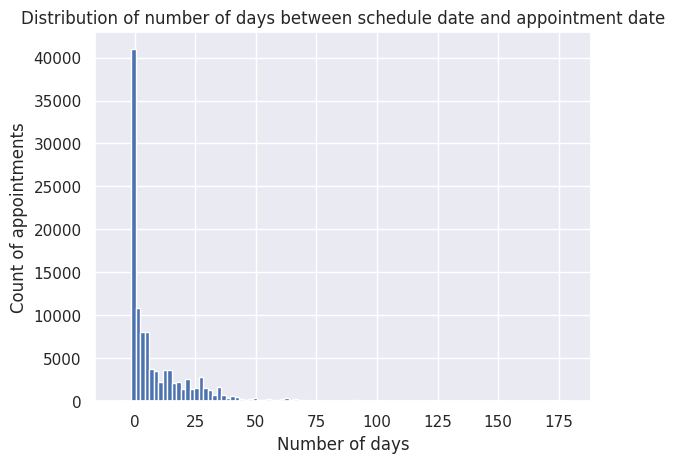

In [75]:
datediff = round(datediff / np.timedelta64(1, 'D')).astype('int')
datediff.hist(bins=100)
plt.xlabel('Number of days')
plt.ylabel('Count of appointments')
plt.title('Distribution of number of days between schedule date and appointment date')
plt.show()

In [77]:
df['date_diff'] = datediff


#### Appointment that is scheduled on the current day are less likely to cancel, no show rate is very good.
#### The more in advance the appointment is scheduled, less likey it is to happen

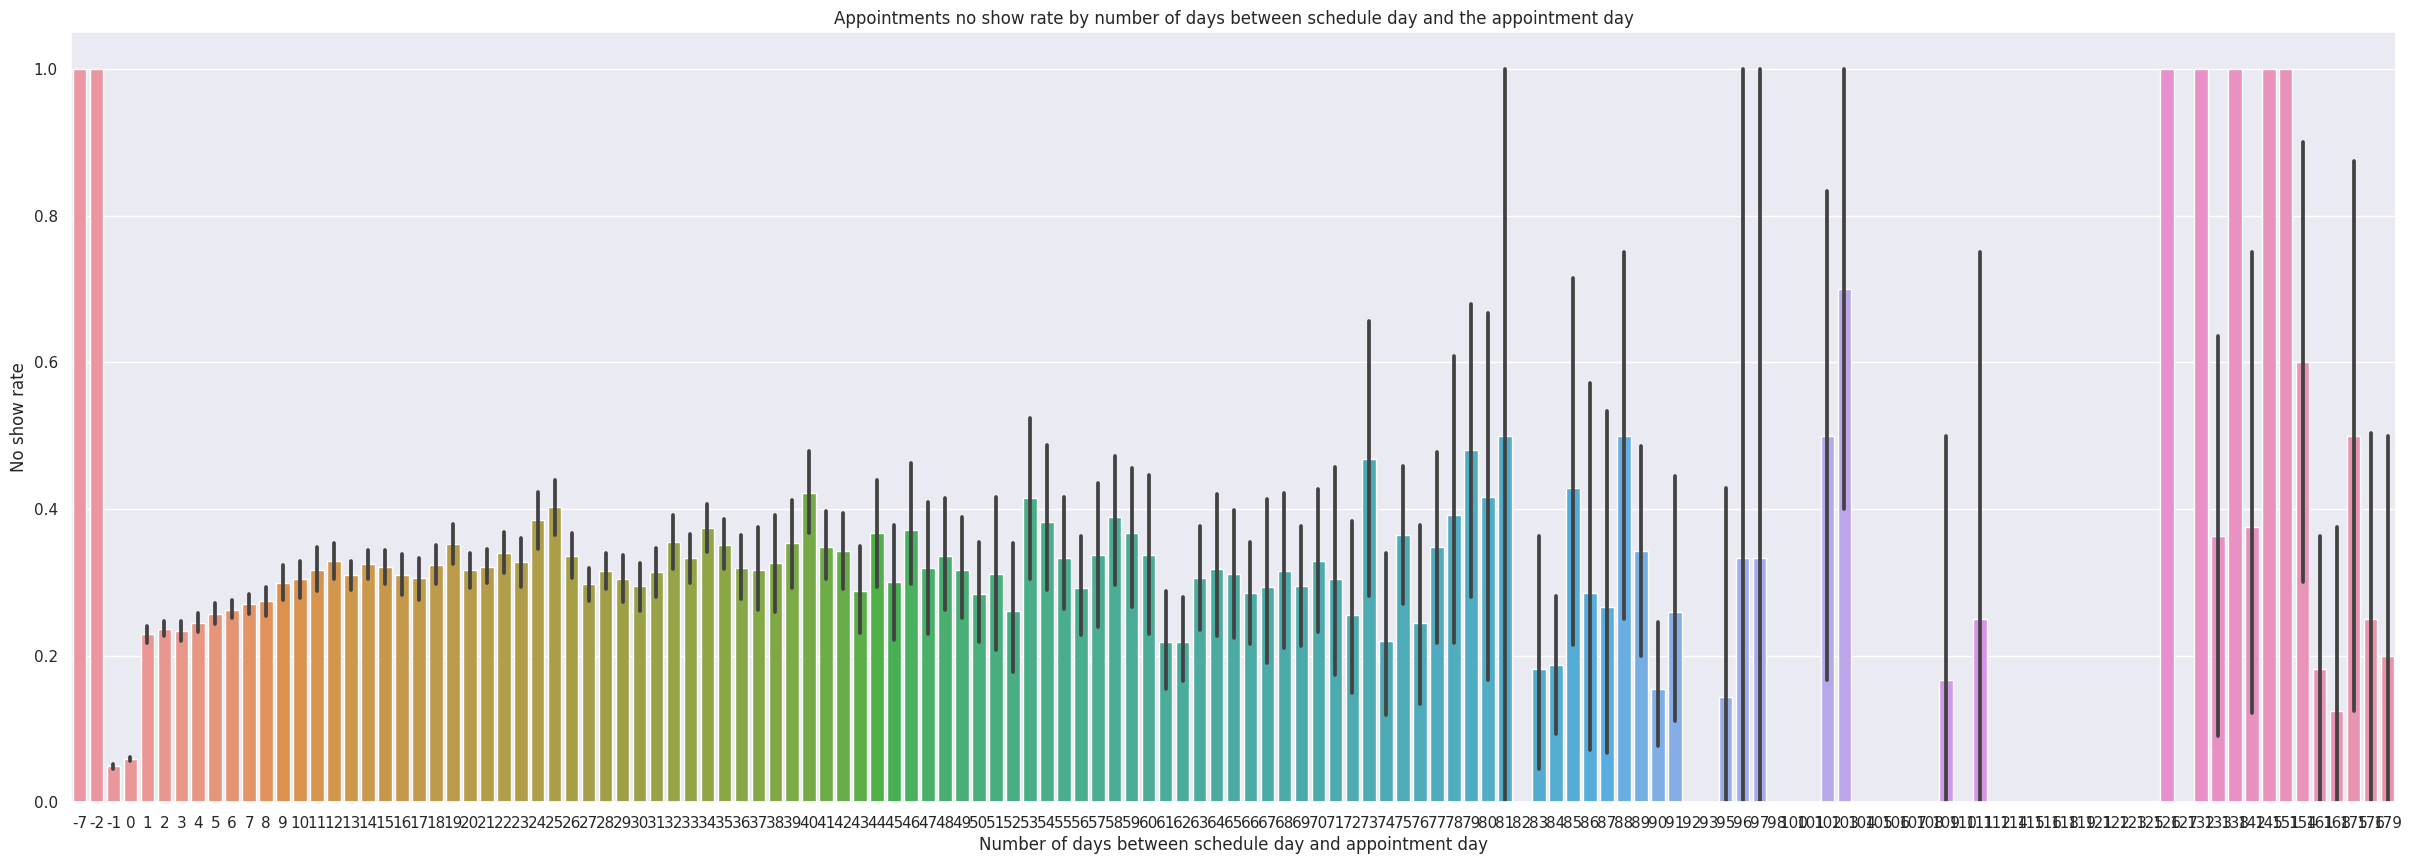

In [78]:
plt.figure(figsize=(30,10))
bar_plot(df['date_diff'], df['no_show'], 'Number of days between schedule day and appointment day', 'No show rate', \
         'Appointments no show rate by number of days between schedule day and the appointment day')
plt.show()

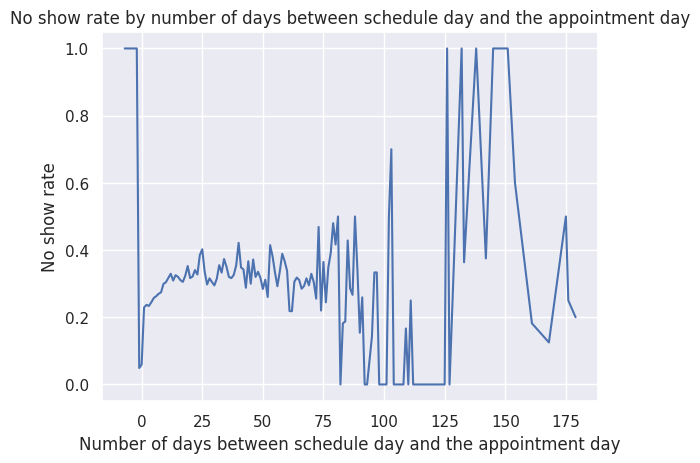

In [81]:
y_means = df['no_show'].groupby(df['date_diff']).mean()
x_datediff = df['date_diff'].unique()
x_datediff = sorted(x_datediff)
plt.errorbar(x = x_datediff, y = y_means)
plt.title('No show rate by number of days between schedule day and the appointment day')
plt.xlabel('Number of days between schedule day and the appointment day')
plt.ylabel('No show rate')
plt.show()

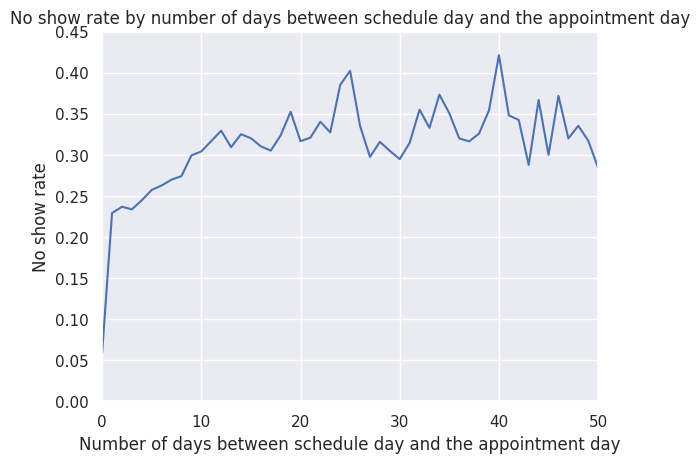

In [82]:
# looking more closely to the relevant part to see the pattern
y_means = df['no_show'].groupby(df['date_diff']).mean()
x_datediff = df['date_diff'].unique()
x_datediff = sorted(x_datediff)
plt.errorbar(x = x_datediff, y = y_means)
plt.title('No show rate by number of days between schedule day and the appointment day')
plt.xlabel('Number of days between schedule day and the appointment day')
plt.ylabel('No show rate')
plt.xlim(0,50)
plt.ylim(0,0.45)
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## The main findings are the following:

 - Appointments of alcoholics are skipped more frequently than the average appointments are.
 - Appointments of patients with hypertension have lower no show up rate than those without the disease.
 - Appointments of patients on scholarship have higher no show rates than appointments without a scholarship.
 - Appointments of males and females have very similar no show rates.
 - No show rate decreases with age in our dataset.
 - There is an increasing trend of no show rate as the day difference between schedule and appointment day gets larger, especially within the first 20 days.

In [83]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 16 image(s).
[NbConvertApp] Writing 1637302 bytes to Investigate_a_Dataset.html
